In [11]:
import matplotlib.pyplot as plt
import numpy as np
try:
    import photovoltaic as pv
except:
    print('install photovoltaic if needed')
    !pip install photovoltaic
    import photovoltaic as pv

## Semiconductor and silicon basics

In [14]:
print('Thermal voltage 25 degC (V):', pv.Vt())  # default is 25degC
print('Thermal voltage 300 K (V):', pv.Vt(300))
print(f'Silicon intrinsic carrier concentation, ni, at 25 degC {pv.si.ni_misiakos():.3e} cm-3')
print(f'Silicon intrinsic carrier concentation, ni, at 300 K {pv.si.ni_misiakos(300):.3e} cm-3')


Thermal voltage 25 degC (V): 0.02569257041324195
Thermal voltage 300 K (V): 0.02585199102456007
Silicon intrinsic carrier concentation, ni, at 25 degC 8.305e+09 cm-3
Silicon intrinsic carrier concentation, ni, at 300 K 9.696e+09 cm-3


## Mobility in silicon 

Comparison of Thurber and Masetti mobility models in silicon. Changes are evident at high doping above 1e20.

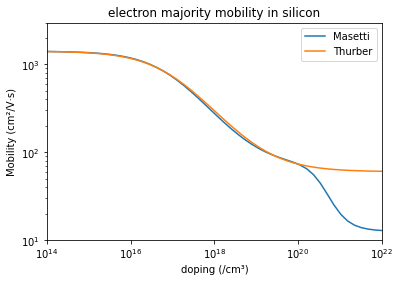

In [13]:
N_D = np.logspace(14, 22) # log space from 1e14 to 1e22
mobility_masetti = pv.si.mob_masetti_phos(N_D)
mobility_thurber = pv.si.mob_thurber(N_D, False)
plt.plot(N_D, mobility_masetti, label='Masetti')
plt.plot(N_D, mobility_thurber, label='Thurber')
plt.xlabel('doping (/cm³)')
plt.ylabel('Mobility (cm²/V·s)')
plt.loglog()
plt.ylim(10, 3000)
plt.xlim(1e14, 1e22)
plt.legend(loc=0)
plt.title('electron majority mobility in silicon')
plt.savefig('plot_silicon_mobility.png')
plt.show()

## Mobility in silicon 

changes are only evident at high doping

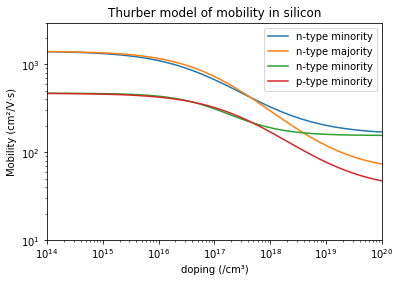

In [32]:
doping = np.logspace(14, 22) # log space from 1e14 to 1e22
plt.plot(doping, pv.si.mob_thurber(doping, p_type=False,majority=False), label='n-type minority')
plt.plot(doping, pv.si.mob_thurber(doping, p_type=False),label='n-type majority')
plt.plot(doping, pv.si.mob_thurber(doping, p_type=True, majority=False), label='n-type minority')
plt.plot(doping, pv.si.mob_thurber(doping, p_type=True), label='p-type minority')
plt.xlabel('doping (/cm³)')
plt.ylabel('Mobility (cm²/V·s)')
plt.loglog()
plt.ylim(10, 3000)
plt.xlim(1e14, 1e20)
plt.legend(loc=0)
plt.title('Thurber model of mobility in silicon')
plt.savefig('plot_silicon_mobility.png')
plt.show()

## Specific Solar Cell Material
n-type silicon at a doping of 2e15

In [37]:
print('n-type cell with doping level of 2e15')
ni = pv.si.ni_misiakos()
n0, p0 = pv.semi.equilibrium_carrier(2e15, ni)  # n-type dioping at 1e15
print('Majority n {n0:.3e}, Minority p: {p0:.3e}')
dn = 1e15
dEc, dEv = pv.si.bandgap_schenk(n0 + dn, p0 + dn, n0, p0, dn)
print(f'BGN Ec: {dEc:.2e} eV, Ev {dEv:.2e} eV')
print(f'nieff {pv.si.n_ieff(n0, p0, 1e15):.3e}')
B = pv.si.U_radiative_alt(n0, p0, dn)
print(f'radiative: {B:.3}')


n-type cell with doping level of 2e15
Majority n {n0:.3e}, Minority p: {p0:.3e}
BGN Ec: 1.22e-03 eV, Ev 1.28e-03 eV
nieff 8.718e+09
radiative: 1.32e+16


AttributeError: module 'photovoltaic' has no attribute 'mob_masetti_phos'